In [3]:
import pandas as pd

class Professor:
    def __init__(self, SERVIDOR, MATRICULA, COD_DISCIPLINA, TURNO, CH_TOTAL, lista_escolas):

        self.SERVIDOR = SERVIDOR
        self.MATRICULA = MATRICULA
        self.COD_DISCIPLINA = COD_DISCIPLINA
        self.TURNO = TURNO
        self.CH_TOTAL = CH_TOTAL
        self.lista_escolas = lista_escolas


# Carregar o DataFrame
base_professores = pd.read_excel('professores.xlsx')

base_professores = base_professores[base_professores['COD_DISCIPLINA'] == 2002]
# Dicionário para armazenar os objetos Escola
escolas_dict = {}

# Percorrer as linhas do DataFrame
for indice, linha in base_professores.iterrows():
    # Gerar o nome do objeto
    nome_objeto = f"{linha['SERVIDOR']}_{linha['MATRICULA']}_{linha['COD_DISCIPLINA']}"
        
    # Criar um objeto Escola para cada linha com CH_RELATIVA e VAGAS calculadas
    professor = Professor(
        linha['SERVIDOR'],
        linha['MATRICULA'],
        linha['COD_DISCIPLINA'],
        linha['TURNO'],
        CH_TOTAL = [],
        lista_escolas=[]
    )

    # Adicionar o objeto ao dicionário usando o nome como chave
    escolas_dict[nome_objeto] = professor

for objeto_print, prof_print in escolas_dict.items():
    print(f"Nome do objeto: {objeto_print}")




Nome do objeto: Professor 1_5948590.0_2002.0
Nome do objeto: Professor 3_5973168.0_2002.0
Nome do objeto: Professor 5_5922696.0_2002.0
Nome do objeto: Professor 7_5974417.0_2002.0
Nome do objeto: Professor 97_5951405.0_2002.0
Nome do objeto: Professor 2_5936943.0_2002.0
Nome do objeto: Professor 6_5936943.0_2002.0
Nome do objeto: Professor 8_5923338.0_2002.0
Nome do objeto: Professor 4_5971966.0_2002.0
Nome do objeto: Professor 10_5951385.0_2002.0
Nome do objeto: Professor 9_5951384.0_2002.0


In [4]:
for nome_objeto, professor in escolas_dict.items():

    for index, escolas in base_professores.iterrows():
        
        if (professor.MATRICULA == escolas['MATRICULA']):

                if escolas['COD_ESCOLA'] not in professor.lista_escolas:
                    professor.lista_escolas.append(escolas['COD_ESCOLA'])
                    professor.CH_TOTAL.append(int(escolas['CH_TOTAL']))


print('-'*20)
for objeto_print, prof_print in escolas_dict.items():
    print(f"Nome do objeto: {objeto_print}, Escolas: {prof_print.lista_escolas}, CH Respectivamente: {prof_print.CH_TOTAL}")
print('-'*20)

--------------------
Nome do objeto: Professor 1_5948590.0_2002.0, Escolas: [1, 3], CH Respectivamente: [39, 3]
Nome do objeto: Professor 3_5973168.0_2002.0, Escolas: [5, 3], CH Respectivamente: [39, 3]
Nome do objeto: Professor 5_5922696.0_2002.0, Escolas: [5, 1], CH Respectivamente: [39, 3]
Nome do objeto: Professor 7_5974417.0_2002.0, Escolas: [3, 6], CH Respectivamente: [39, 3]
Nome do objeto: Professor 97_5951405.0_2002.0, Escolas: [6, 1], CH Respectivamente: [39, 3]
Nome do objeto: Professor 2_5936943.0_2002.0, Escolas: [2, 3], CH Respectivamente: [39, 3]
Nome do objeto: Professor 6_5936943.0_2002.0, Escolas: [2, 3], CH Respectivamente: [39, 3]
Nome do objeto: Professor 8_5923338.0_2002.0, Escolas: [1, 4], CH Respectivamente: [39, 3]
Nome do objeto: Professor 4_5971966.0_2002.0, Escolas: [4, 5], CH Respectivamente: [39, 3]
Nome do objeto: Professor 10_5951385.0_2002.0, Escolas: [3, 5], CH Respectivamente: [39, 3]
Nome do objeto: Professor 9_5951384.0_2002.0, Escolas: [3], CH Resp

In [5]:
import pandas as pd

# Criar um DataFrame vazio com os professores como índice e escolas como colunas
df = pd.DataFrame(index=escolas_dict.keys(), columns=list(set(escola for prof in escolas_dict.values() for escola in prof.lista_escolas)))

# Preencher o DataFrame com as cargas horárias
for nome_objeto, professor in escolas_dict.items():
    for escola, carga_horaria in zip(professor.lista_escolas, professor.CH_TOTAL):
        df.at[nome_objeto, escola] = carga_horaria

# Preencher valores vazios com 0
df = df.fillna(0)

# Exibir o DataFrame
print(df)

                                1   2   3   4   5   6
Professor 1_5948590.0_2002.0   39   0   3   0   0   0
Professor 3_5973168.0_2002.0    0   0   3   0  39   0
Professor 5_5922696.0_2002.0    3   0   0   0  39   0
Professor 7_5974417.0_2002.0    0   0  39   0   0   3
Professor 97_5951405.0_2002.0   3   0   0   0   0  39
Professor 2_5936943.0_2002.0    0  39   3   0   0   0
Professor 6_5936943.0_2002.0    0  39   3   0   0   0
Professor 8_5923338.0_2002.0   39   0   0   3   0   0
Professor 4_5971966.0_2002.0    0   0   0  39   3   0
Professor 10_5951385.0_2002.0   0   0  39   0   3   0
Professor 9_5951384.0_2002.0    0   0  27   0   0   0


In [ ]:
hrs_a_doar = [for x in range(professor.)]

In [6]:
import copy

def avaliar_alocacao(professores):
    return sum(1 for prof in professores.values() if len(prof.lista_escolas) > 1)

def busca_local(professores):
    max_iteracoes = 1000
    iteracao = 0

    melhor_avaliacao = avaliar_alocacao(professores)
    melhor_alocacao = copy.deepcopy(professores)

    while iteracao < max_iteracoes:
        professores_selecionados = list(professores.values())[:2]

        for i in range(len(professores_selecionados)):
            for j in range(len(professores_selecionados)):
                if i != j:
                    prof1, prof2 = professores_selecionados[i], professores_selecionados[j]

                    for escola in set(prof1.lista_escolas + prof2.lista_escolas):
                        ch_prof1 = prof1.CH_TOTAL[prof1.lista_escolas.index(escola)] if escola in prof1.lista_escolas else 0
                        ch_prof2 = prof2.CH_TOTAL[prof2.lista_escolas.index(escola)] if escola in prof2.lista_escolas else 0

                        if escola in prof1.lista_escolas:
                            prof1.CH_TOTAL[prof1.lista_escolas.index(escola)] = ch_prof2
                        if escola in prof2.lista_escolas:
                            prof2.CH_TOTAL[prof2.lista_escolas.index(escola)] = ch_prof1

        nova_avaliacao = avaliar_alocacao(professores)

        if nova_avaliacao < melhor_avaliacao:
            melhor_alocacao = copy.deepcopy(professores)
            melhor_avaliacao = nova_avaliacao

        iteracao += 1

    return melhor_alocacao

# Chamar a busca local
nova_alocacao = busca_local(escolas_dict)

# Exibir a nova alocação
for nome_objeto, professor in nova_alocacao.items():
    print(f"Nome do objeto: {nome_objeto}, Escolas: {professor.lista_escolas}, CH Respectivamente: {professor.CH_TOTAL}")


Nome do objeto: Professor 1_5948590.0_2002.0, Escolas: [1, 3], CH Respectivamente: [39, 3]
Nome do objeto: Professor 3_5973168.0_2002.0, Escolas: [5, 3], CH Respectivamente: [39, 3]
Nome do objeto: Professor 5_5922696.0_2002.0, Escolas: [5, 1], CH Respectivamente: [39, 3]
Nome do objeto: Professor 7_5974417.0_2002.0, Escolas: [3, 6], CH Respectivamente: [39, 3]
Nome do objeto: Professor 97_5951405.0_2002.0, Escolas: [6, 1], CH Respectivamente: [39, 3]
Nome do objeto: Professor 2_5936943.0_2002.0, Escolas: [2, 3], CH Respectivamente: [39, 3]
Nome do objeto: Professor 6_5936943.0_2002.0, Escolas: [2, 3], CH Respectivamente: [39, 3]
Nome do objeto: Professor 8_5923338.0_2002.0, Escolas: [1, 4], CH Respectivamente: [39, 3]
Nome do objeto: Professor 4_5971966.0_2002.0, Escolas: [4, 5], CH Respectivamente: [39, 3]
Nome do objeto: Professor 10_5951385.0_2002.0, Escolas: [3, 5], CH Respectivamente: [39, 3]
Nome do objeto: Professor 9_5951384.0_2002.0, Escolas: [3], CH Respectivamente: [27]


Nesse exemplo da visualização gerada, o ideial seria que o professor 1 some as 3hrs de ch da escola 3 a sua escola principal, mas para isso seria necessario que algum outro professor liberasse 3 hrs na escola 1 para essa troca ser feita. Um exemplo de como isso poderia acontecer é o seguinte: o Professor 1 Doa 3 horas para o professor 7 que por sua vez doa 3 horas para o professor 97 que por fim doaria suas 3 hrs para o professor 1 e todos ficariam em apenas uma escola, veja que para isto precisamos verifica as interceções de escolas e como suas Ch poderiam ser compativeis


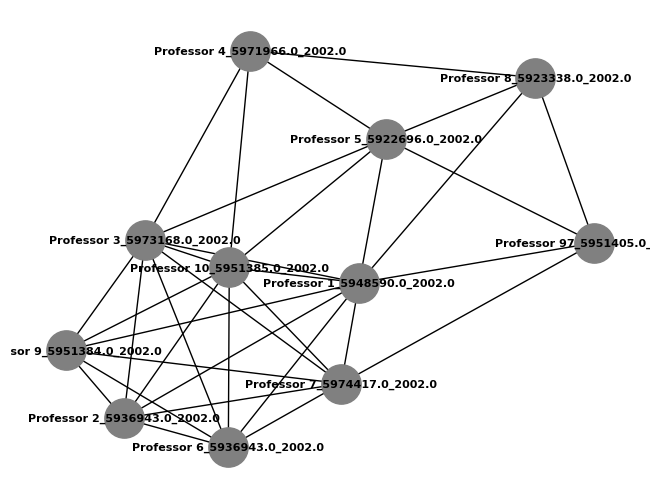

In [235]:
import networkx as nx
import matplotlib.pyplot as plt

def gerar_grafo_doacoes(professores):
    grafo = nx.Graph()

    for prof1 in professores:
        for prof2 in professores:
            # Verifica se professores têm escola em comum e carga horária pode ser transferida
            if prof1 != prof2 and set(professores[prof1].lista_escolas).intersection(professores[prof2].lista_escolas):
                grafo.add_edge(prof1, prof2)

    return grafo

# Suponha que 'escolas_dict' seja o dicionário de professores que você criou anteriormente
grafo_doacoes = gerar_grafo_doacoes(escolas_dict)

# Visualize o grafo (opcional, requer a biblioteca networkx e matplotlib)
pos = nx.spring_layout(grafo_doacoes)
nx.draw(grafo_doacoes, pos, with_labels=True, font_weight='black', node_color='gray', node_size=800, font_size=8)
plt.show()



In [237]:
# Certamente! Vamos analisar cada parte do código e, em seguida, discutir como você pode adicionar mais critérios ao seu problema.

# ### Função `avaliar_alocacao(professores)`

# Esta função simplesmente conta o número de professores que estão alocados em mais de uma escola. A ideia é usar isso como uma métrica de qualidade da alocação. No seu problema, você pode querer ajustar essa métrica ou adicionar mais critérios.

# ### Função `busca_local(professores)`

# 1. **Definição de parâmetros:**
#    - `max_iteracoes`: Número máximo de iterações do algoritmo de busca local.
#    - `iteracao`: Contador para o número atual de iterações.
#    - `melhor_avaliacao`: Métrica de avaliação da melhor alocação encontrada até o momento.
#    - `melhor_alocacao`: Cópia da alocação correspondente à melhor avaliação.

# 2. **Loop Principal:**
#    - O algoritmo realiza trocas de carga horária entre escolas de dois professores selecionados aleatoriamente.
#    - A avaliação é feita para medir a qualidade da nova alocação.
#    - Se a nova alocação for melhor que a melhor até o momento, atualizamos a alocação e a avaliação.

# 3. **Retorno:**
#    - O algoritmo retorna a melhor alocação encontrada.

# ### Exemplo de Uso:

# - `nova_alocacao = busca_local(escolas_dict)`: Chama a função `busca_local` passando o dicionário de professores.
# - `for nome_objeto, professor in nova_alocacao.items()`: Itera sobre a nova alocação e imprime os resultados.

# ### Adicionando Mais Critérios:

# Para adicionar mais critérios, você pode ajustar a função `avaliar_alocacao` para levar em consideração outros fatores. Por exemplo, se quiser minimizar não apenas o número de escolas, mas também a diferença total de carga horária entre os professores, você pode ajustar a métrica de avaliação.

# Se você puder fornecer detalhes específicos sobre os critérios adicionais que deseja incluir, posso ajudá-lo a incorporá-los no código. Pode ser relacionado à carga horária total, preferências dos professores, ou qualquer outra restrição específica do seu problema.

-
3.0
3.0
3.0
3.0
3.0
3.0
45.0
3.0
3.0
3.0
27.0

